## Time Series Exploration 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


## Splitting Our Data

- Human Based 
- Percentage Based
- Cross-Validation 

In [20]:
df.shape

(45252, 1)

In [3]:
# make sure index is sorted before splitting (older dates first - most recent dates)
train_len = int(0.6 *len(df))
val_test_split = int(0.8 *len(df))
train_len, val_test_split

(27151, 36201)

In [4]:
train = df.iloc[:train_len]
val = df.iloc[train_len:val_test_split]
test = df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((27151, 1), (9050, 1), (9051, 1))

In [5]:
train = df.loc[:'2016']
test = df.loc['2017']
train.shape, test .shape

((37259, 1), (7993, 1))

## Visualize Individual Variables

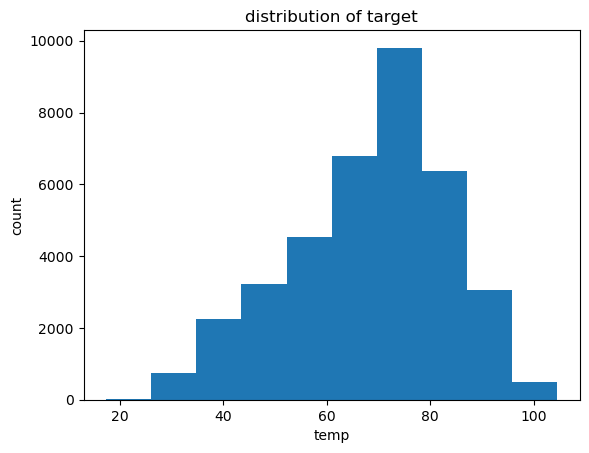

In [6]:
plt.hist(train)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

In [7]:
train['month'] = train.index.month_name()
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,October
2012-10-01 14:00:00,61.076568,October
2012-10-01 15:00:00,61.139294,October
2012-10-01 16:00:00,61.202020,October
2012-10-01 17:00:00,61.264747,October


<AxesSubplot:xlabel='month'>

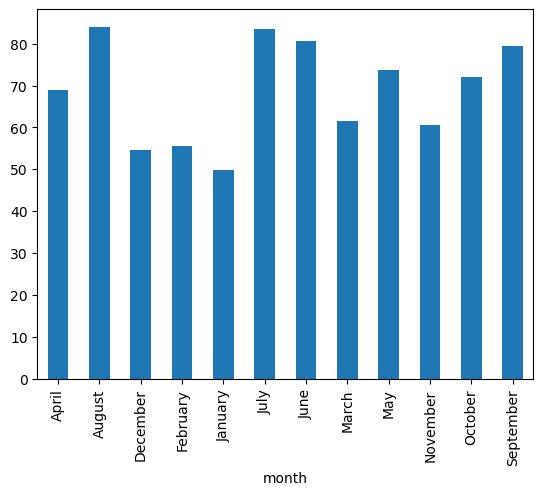

In [31]:
train.groupby('month')['temp'].mean().plot.bar()

## Visualize Target Over Time

<AxesSubplot:xlabel='datetime'>

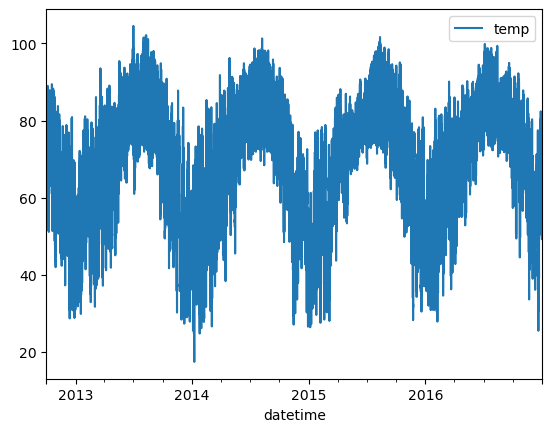

In [9]:
train.plot()

<AxesSubplot:xlabel='datetime'>

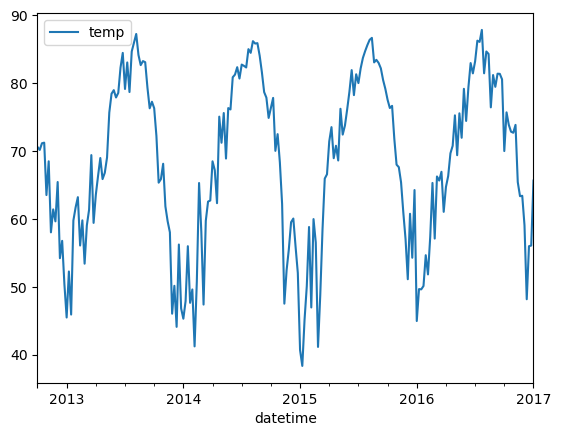

In [10]:
train.resample('W').mean().plot()

<AxesSubplot:xlabel='datetime'>

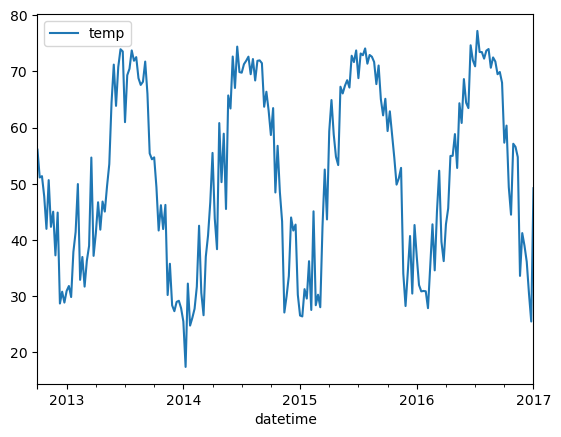

In [11]:
train.resample('W').min().plot()

<AxesSubplot:xlabel='datetime'>

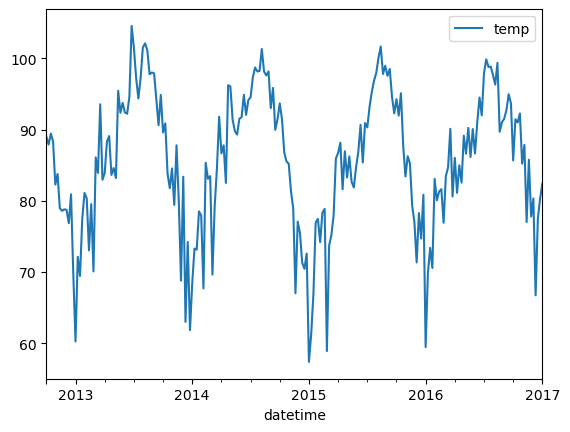

In [12]:
train.resample('W').max().plot()

<AxesSubplot:xlabel='datetime'>

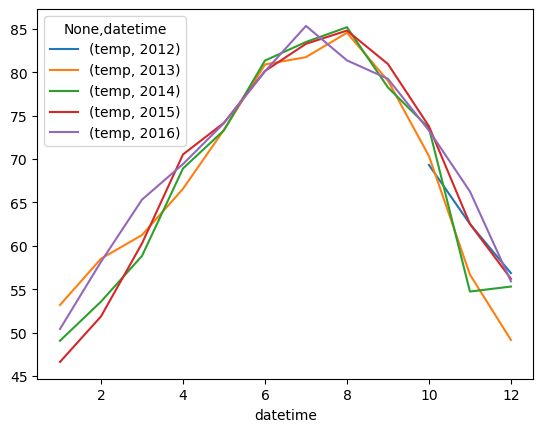

In [13]:
train.groupby([train.index.year,train.index.month]).mean().unstack(0).plot()

## Lag Plots

In [14]:
week_mean = train.resample('W').mean()
week_mean

,temp
datetime,
2012-10-07,70.595201
2012-10-14,70.152821
2012-10-21,71.138375
2012-10-28,71.230464
2012-11-04,63.510554
...,...
2016-12-04,59.062094
2016-12-11,48.163625
2016-12-18,55.979132


In [15]:
week_mean['shifted'] = week_mean['temp'].shift(-1)
week_mean

,temp,shifted
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2016-12-04,59.062094,48.163625
2016-12-11,48.163625,55.979132
2016-12-18,55.979132,56.073143


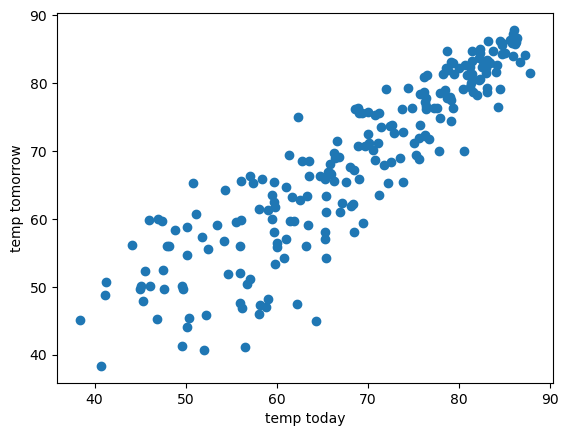

In [16]:
plt.scatter(week_mean['temp'], week_mean['shifted'])
plt.xlabel('temp today')
plt.ylabel('temp tomorrow')
plt.show()

In [17]:
train

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,October
2012-10-01 14:00:00,61.076568,October
2012-10-01 15:00:00,61.139294,October
2012-10-01 16:00:00,61.202020,October
2012-10-01 17:00:00,61.264747,October
...,...,...
2016-12-31 19:00:00,63.230000,December
2016-12-31 20:00:00,68.216000,December
2016-12-31 21:00:00,70.664000,December


In [18]:
week_mean['half_year'] = week_mean['temp'].shift(-26)

week_mean.head()

,temp,shifted,half_year
datetime,,,
2012-10-07,70.595201,70.152821,63.558611
2012-10-14,70.152821,71.138375,66.345532
2012-10-21,71.138375,71.230464,68.965502
2012-10-28,71.230464,63.510554,65.862071
2012-11-04,63.510554,68.482625,66.797107


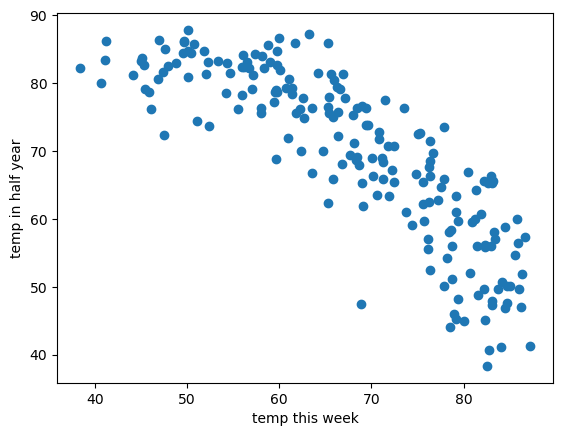

In [19]:
plt.scatter(week_mean['temp'], week_mean['half_year'])
plt.xlabel('temp this week')
plt.ylabel('temp in half year')
plt.show()

## Autocorrelation Plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

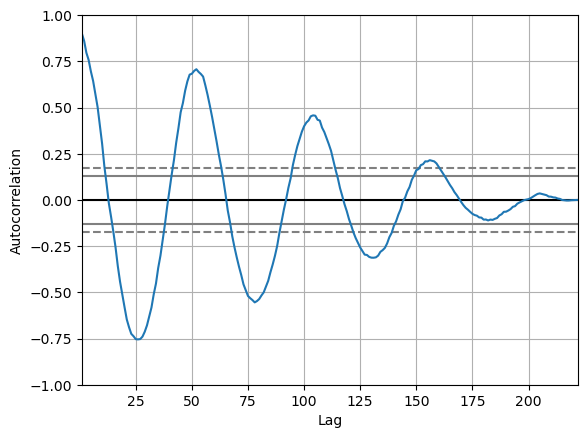

In [26]:
pd.plotting.autocorrelation_plot(train.resample('W').mean())

## Seasonal Decomposition 

- observed, trend, seasonal, resid

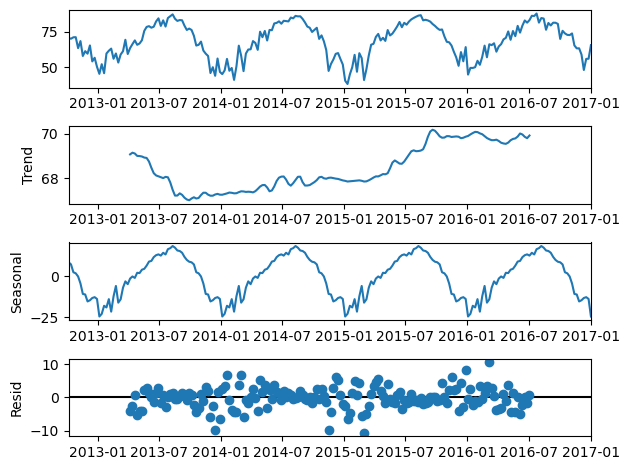

In [29]:
result = sm.tsa.seasonal_decompose(train.resample('W').mean())

result.plot()
plt.show()